In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist


def accuracy(Y,P):
    return np.count_nonzero(np.equal(np.argmax(Y,axis=-1),np.argmax(P,axis=-1)).astype(int))/float(Y.shape[0])

def visualize(data):
    p = data.reshape((28,28))
    plt.imshow(p,interpolation='none', cmap='gray_r')
    plt.show()

%matplotlib inline

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape((x_train.shape[0], x_train.shape[1]*x_train.shape[2]))/255.
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1]*x_test.shape[2]))/255.

In [3]:
print(x_train.shape)
print(y_train.shape)
print(y_train[0:10])
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
[5 0 4 1 9 2 1 3 1 4]
(10000, 784)
(10000,)


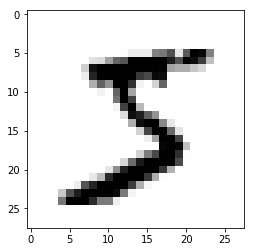

In [4]:
visualize(x_train[0])

In [7]:
#GRADED function
#Don't change the function name, parameters and return values
def one_hot(y):
    """
        Transforms labels to one-hot encoded labels.
        Input: 
            * y:   (M,)
        Output:
            * y_oh: (M, K)
    """
    y_oh = None
    ###Start code here
    
    M = len(y)
    K = np.max(y) + 1
    y_oh = np.zeros((M,K))
    for i in range(M):
        y_oh[i,y[i]] = 1
    
    ###End code here
    return y_oh

In [8]:
one_hot(y_train)[0:10]

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]])

In [7]:
y_train_oh = one_hot(y_train)
y_test_oh = one_hot(y_test)

print(y_train_oh.shape)
print(y_test_oh.shape)

(60000, 10)
(10000, 10)


In [8]:
#GRADED function
#Don't change the function name, parameters and return values
def initialize_weights(layer_dimensions):
    """
        Initialize the weights of the neural network.
        Input:
            * layer_dimensions: list containing the number of neurons for each layer. 
                                layer_dimensions[0] is the dimensionality of our data. 
                                layer_dimensions[1] is the number of neurons in the first layer.
        Output:
            * parameters: dict containing the weights of the network.
                          parameters["W1"] = the W weight matrix of the first layer
                          parameters["b1"] = the b bias node of the first layer
    """
    parameters={}
    ###Start code here
    
    for i in range (len(layer_dimensions)-1):
        weight_name = "W" + str(i+1)
        bias_name = "b" + str(i+1)
        
        parameters[weight_name] = np.random.randn(layer_dimensions[i+1],layer_dimensions[i])*0.01
        parameters[bias_name] = np.zeros((layer_dimensions[i+1],1))

    ###End code here
    return parameters

In [9]:
np.random.seed(0)
parameters = initialize_weights([3,6])
print("W1.shape=",parameters["W1"].shape)
print("b1.shape=",parameters["b1"].shape)
print("W1=",parameters["W1"])
print("b1=",parameters["b1"])

W1.shape= (6, 3)
b1.shape= (6, 1)
W1= [[ 0.01764052  0.00400157  0.00978738]
 [ 0.02240893  0.01867558 -0.00977278]
 [ 0.00950088 -0.00151357 -0.00103219]
 [ 0.00410599  0.00144044  0.01454274]
 [ 0.00761038  0.00121675  0.00443863]
 [ 0.00333674  0.01494079 -0.00205158]]
b1= [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]


In [36]:
#GRADED function
#Don't change the function name, parameters and return values
def linear_forward(W, b, a_prev):
    """
        Linear unit in the computational graph.
        Inputs:
                * W: the weight matrix of the unit (dimensions in the graph above)
                * b: the bias vector of the unit (dimensions in the graph above)
                * a_prev: the activation from the previous node (dimensions in the graph above)
        Outputs:
                * Z:     the result (dimensions in the graph above)
                * cache: combination of values you will need in backward passes
    """
    ###Start code here
    
    # Calculate Z
    
    Z = np.dot(W,a_prev) + b

    # Create a cache for backpropagation
    cache = (Z,W,a_prev)
    
    ###End code here
    return Z, cache

In [11]:
np.random.seed(0)
parameters = initialize_weights([3,2])
x = np.random.randn(1,3).T
Z, cache = linear_forward(parameters["W1"],parameters["b1"],x)
print(Z)

W.shape =  (2, 3)
a_prev.shape =  (3, 1)
b.shape =  (2, 1)
[[ 0.01514415]
 [ 0.01947252]]


In [13]:
#GRADED function
#Don't change the function name, parameters and return values
def activation_forward(Z):
    """
        Activation node on the forward computational graph.
        Inputs:
                Z: the ouput of linear unit
        Outputs:
                a: the activation
    """
    ###Start code here
   
    #implement sigmoid activation
    a = 1./(1+np.exp(-1*Z))

    ###End code here
    return a

In [14]:
np.random.seed(0)
Z = np.random.randn(2,3)
activation_forward(Z)

array([[ 0.85371646,  0.59872543,  0.72685773],
       [ 0.9038621 ,  0.86617546,  0.27343225]])

In [20]:
#GRADED function
#Don't change the function name, parameters and return values
def softmax(Z):
    """
        Calculates the softmax of a matrix.
        Input: 
            * Z: (M,K)=(num_examples, num_categories)
        Returns:
            * a: (M,K)=(num_examples, num_categories)
    """
    ###Start code here
    
    # Transform Z to probabilites
    # The sum should be on categories!

    a = np.divide(np.exp(Z),np.sum(np.exp(Z),axis = 1, keepdims = True))
    
    ###End code here
    return a

In [21]:
np.random.seed(0)
Z = np.random.randn(2,3)
softmax(Z)

array([[ 0.58423523,  0.14936733,  0.26639744],
       [ 0.57854881,  0.39829292,  0.02315827]])

In [16]:
#GRADED function
#Don't change the function name, parameters and return values
def nn_forward(parameters, X):
    """
        Calculates a forward step in the network.
        Input:
            * parameters: dict of parameters.
                          parameters["W1"]= the W matrix of first layer
                          parameters["b4"]=the bias vector in layer 4
            * X: input matrix. Shape (M,K)
    """
    caches = []
    L = len(parameters)//2
    
    ###Start code here
    
    # Set a_prev to the input!
    # In the first node of the computational graph, the input is transposed!
    a = X.T
    
    # Go trough the nodes of the computational graph, from LEFT to RIGHT
    # Always use as the input of current node the ouput of previous node!
    # Get the W, b weights from the parameters dictionary
    # use linear_forward and activation_forward function to step one in the layer
    # append the linear unit's cache to caches list
    
    for i in range(L-1):
        weight_name = "W" + str(i+1)
        bias_name = "b" + str(i+1)
        
        Z,new_cache = linear_forward(parameters[weight_name],parameters[bias_name],a)
        caches.append(new_cache)
        
        a = activation_forward(Z)
    
    # Important: the last layer activation should be softmax! 
    # Important: Transpose Z (in the last unit)
            
    weight_name = "W" + str(L)
    bias_name = "b" + str(L)
        
    Z,new_cache = linear_forward(parameters[weight_name],parameters[bias_name],a)
    caches.append(new_cache)
    
    a = softmax(Z.T)

    ###End code here
    
    return (a,caches)

In [17]:
np.random.seed(1)
parameters = initialize_weights([3,4,2])
x = np.random.randn(2,3)
AL, cache = nn_forward(parameters, x)
print(AL)
print(cache[0][0])
print(cache[1][0])

W.shape =  (4, 3)
a_prev.shape =  (3, 2)
b.shape =  (4, 1)
W.shape =  (2, 4)
a_prev.shape =  (4, 2)
b.shape =  (2, 1)
[[ 0.49967587  0.50032413]
 [ 0.49966831  0.50033169]]
[[-0.02964272  0.00626246]
 [ 0.00096537  0.01814073]
 [-0.02504102 -0.00027116]
 [ 0.00090768  0.02600417]]
[[-0.00341347 -0.0034577 ]
 [-0.00211695 -0.00213094]]


In [18]:
#GRADED function
#Don't change the function name, parameters and return values
def crossentropy(P, Y):
    """
        Calculates the crossentropy-loss shown in the computational graph above.
        Inputs:
                * P the prediction of the network (dimensions above)
                * Y the one-hot encoded labels
        Outputs:
                * The crossentropy between the P and Y
    """
    ### Start code here
   
    #calculate the coross entropy loss
    
    M = len(Y)
    loss = -1/M * np.sum(np.multiply(Y,np.log(P)))
    
    ### End code here
    return loss

In [19]:
np.random.seed(1)
parameters = initialize_weights([3,4,2])
x = np.random.randn(2,3)
AL, cache = nn_forward(parameters, x)
y = np.array(([[0,1],[1,0]]))
crossentropy(AL,y)

W.shape =  (4, 3)
a_prev.shape =  (3, 2)
b.shape =  (4, 1)
W.shape =  (2, 4)
a_prev.shape =  (4, 2)
b.shape =  (2, 1)


0.69315495522680215

In [20]:
#GRADED function
#Don't change the function name, parameters and return values
def losssoftmax_backward(P,Y):
    """
        Calculates the dLdZ derivate which is in the top of the network. 
        Inputs:
                * P the prediction of the network
                * Y the labels
        Outputs:
                * dLdZ the derivate of the L loss function 
    """
    ###Start code here
    
    #implement the calculation shown in the graph
    
    M = len(Y)
    dLdZ = 1/M * (P-Y).T
    
    ###End code here
    return dLdZ

In [21]:
np.random.seed(1)
parameters = initialize_weights([3,4,2])
x = np.random.randn(3,3)
AL, cache = nn_forward(parameters, x)
y = np.array(([[0,1],[1,0],[1,0]]))

losssoftmax_backward(AL,y)

W.shape =  (4, 3)
a_prev.shape =  (3, 3)
b.shape =  (4, 1)
W.shape =  (2, 4)
a_prev.shape =  (4, 3)
b.shape =  (2, 1)


array([[ 0.16655862, -0.16677723, -0.16676625],
       [-0.16655862,  0.16677723,  0.16676625]])

In [22]:
#GRADED function
#Don't change the function name, parameters and return values
def activation_backward(dLda, cache):
    """
        Calculates the backward step in a non-linearity.
        Inputs:
            * dLda: The derivates above the current unit.
            * cache: The cache from the forward step.
    """
    
    ###Start code here
    
    # Use the cache from the foward step
    # Calculate the g'(Z): the sigmoid derivate (the derivate is: sigmoid(Z)*(1-sigmoid(Z)) )
    # Do the calculation shown in the graph.
    
    Z = cache[0]
    g_prime = np.exp(Z)/np.multiply(1+np.exp(Z),1+np.exp(Z))
    dLdZ = np.multiply(dLda, g_prime)
    
    ###End code here
    return dLdZ

In [23]:
np.random.seed(1)
Z      = np.random.randn(4,2)
W      = np.random.randn(4,3)
a_prev = np.random.randn(3,2)
dLda   = np.random.randn(4,2)
    

dLdZ = activation_backward(dLda, (Z, W, a_prev))

dLdZ

array([[-0.01689878, -0.2133506 ],
       [-0.06251018,  0.10071241],
       [-0.14419048, -0.03281763],
       [-0.08698937, -0.18342292]])

In [24]:
#GRADED function
#Don't change the function name, parameters and return values
def linear_backward(dLdZ, cache):
    """
        Implements the backward step on linear unit as shown in the graph above/
        Inputs: 
                * dLdZ:  the derivate from the next node
                * cache: the cache form froward step
        Returns:
                * dLda
                * dLdW
                * dLdb
    """
    
    ###Start code here
    
    # Use the cache from the forward step
    W = cache[1]
    a = cache[2]
    #Calculate dLda as shown in the graph
    dLda = np.dot(W.T, dLdZ)
    #Calculate the dLdW shown in the graph
    dLdW = np.dot(dLdZ, a.T)
    #Calculate the dLdb shown in the graph
    # Use keepdims=True
    dLdb = np.sum(dLdZ.T,0)
    
    ###End code here
    return (dLda, dLdW, dLdb)

In [25]:
np.random.seed(1)
parameters = initialize_weights([3,2,2])
x = np.random.randn(3,3)
AL, cache = nn_forward(parameters, x)
y = np.array(([[0,1],[1,0],[1,0]]))

dLdZ=losssoftmax_backward(AL,y)

dLda, dLdW, dLdb = linear_backward(dLdZ, cache[-1])
print("dLda=",dLda)
print("dLdW=",dLdW)
print("dLdb=",dLdb)

W.shape =  (2, 3)
a_prev.shape =  (3, 3)
b.shape =  (2, 1)
W.shape =  (2, 2)
a_prev.shape =  (2, 3)
b.shape =  (2, 1)
dLda= [[ 0.00238192 -0.00237095 -0.00237084]
 [-0.00085508  0.00085114  0.0008511 ]]
dLdW= [[-0.08095971 -0.08519952]
 [ 0.08095971  0.08519952]]
dLdb= [-0.16551512  0.16551512]


In [26]:
#GRADED function
#Don't change the function name, parameters and return values
def nn_backward(X, Y, P, caches):
    """
        Calculates the backward pass for the network as shown in the computational graph above.
        Inputs:
                * X: The input examples: (M,N) = (number_of_examples, dimensionality_of_data)
                * Y: The one-hot encoded labels: (M,K) = (number_of_examples, number_of_categories)
                * P: The network prediction: (M,K)
                * caches: the cache from forward step
        Returns:
                * derivates: dictionary containing all the derivates
                             derivates["dLdW2"] = the derivate of the loss L regarding to the weight matrix W of 2. layer
    """
    derivates = {}
    ###Start code here
    
    # Implement the calculation shown in the graph!
    # The arrows in the graph: the output of a unit is the input of the previous unit
    # IMPORTANT: you have to go trough the graph from RIGHT to LEFT
    
    # The last node derivative (loss) initializes the calculation by setting the derivative in the top of the network
    
    NL = len(caches) #number of layers
    dLdZ_name = "dLdZ" + str(NL)
    derivates[dLdZ_name] = losssoftmax_backward(P,Y)
    
    dLda_name = "dLda" + str(NL-1)
    dLdW_name = "dLdW" + str(NL)
    dLdb_name = "dLdb" + str(NL)    
    (derivates[dLda_name], derivates[dLdW_name], derivates[dLdb_name]) = linear_backward(derivates[dLdZ_name], caches[-1])
    
    # compute the backward pass on non-linearity (use the function you implemented)
    # compute the backward pass on linear unit (use the function you implemented)
    # save the derivates to the derivates dict
    # derivates["dLdW2"] = the derivate of the loss L regarding to the weight matrix W of 2. layer
        
    for i in range(NL-1,0,-1):
        dLdZ_name = "dLdZ" + str(i)
        dLdW_name = "dLdW" + str(i)
        dLdb_name = "dLdb" + str(i)
        
        derivates[dLdZ_name] = activation_backward(derivates[dLda_name], caches[i-1])
        dLda_name = "dLda" + str(i-1)
        (derivates[dLda_name], derivates[dLdW_name], derivates[dLdb_name]) = linear_backward(derivates[dLdZ_name], caches[i-1])
        
    ###End code here
    return derivates

In [27]:
np.random.seed(1)
parameters = initialize_weights([3,2,2])
x = np.random.randn(4,3)
y = (np.random.randn(4,2)>0.5).astype(int)
AL, caches = nn_forward(parameters, x)

nn_backward(x,y, AL, caches)

W.shape =  (2, 3)
a_prev.shape =  (3, 4)
b.shape =  (2, 1)
W.shape =  (2, 2)
a_prev.shape =  (2, 4)
b.shape =  (2, 1)


{'dLdW1': array([[ -6.21487264e-04,  -2.36563074e-04,   1.23496218e-03],
        [  3.60961474e-04,  -1.49180228e-05,  -4.73934376e-04]]),
 'dLdW2': array([[  1.23509189e-05,  -1.36228318e-03],
        [ -2.24388132e-03,   2.57328588e-03]]),
 'dLdZ1': array([[-0.00064366, -0.00044455,  0.00064597,  0.00044658],
        [ 0.00031537,  0.00015953, -0.00031617, -0.00016025]]),
 'dLdZ2': array([[-0.12470383, -0.12471917,  0.12528666,  0.12529123],
        [-0.12529617,  0.12471917,  0.12471334, -0.12529123]]),
 'dLda0': array([[ -1.38391873e-05,  -8.93266454e-06,   1.38852440e-05,
           8.97344753e-06],
        [  6.66691944e-06,   4.10011310e-06,  -6.68793679e-06,
          -4.11880490e-06],
        [ -3.85877054e-06,  -1.32363032e-06,   3.86488992e-06,
           1.32951446e-06]]),
 'dLda1': array([[-0.00257559, -0.00177821,  0.0025839 ,  0.00178637],
        [ 0.00126171,  0.00063836, -0.00126469, -0.00064129]]),
 'dLdb1': array([  4.34323857e-06,  -1.51825743e-06]),
 'dLdb2': arra

In [34]:
#GRADED function
#Don't change the function name, parameters and return values
def nn_train_gd(X, Y, layers, n_iter=1000, lr=0.01):
    """
        Creates and trains a neural network with gradient descent.
        Inputs:
                * X: the images (number_of_examples, 28*28)
                * Y: the labels (number_of_examples, 10)
                * layers: the definition of neural networks
                          [28*28, 100, 10]: two layers, 100 neuron in first layer, and 10 neurons in the last layer
                          the first element of this list must be 28*28
                          the number of neurons in the last layer must be the same as Y.shape[1]
                * n_iter: how many iteration we want with gradient descent
                * lr:     learning rate
        Returns:
                * parameters: the trained parameters of the network
                * losses:     the loss values
    """
    L = len(layers)
    losses = []
    
    ###Start code here
    
    #initialize the weights of the network
    parameters = initialize_weights(layers)
    
    # In one iteration of gradient descent:
      # Do a forward step in the network. Use nn_forward
      # Calculate the derivates doing a backward step in the network. Use nn_backward
      # Update the weights
      # Calculate the loss. Use crossentropy. (and save it to losses)
    
    for iteration in range(n_iter):
        AL, caches = nn_forward(parameters, X)
        losses.append(crossentropy(AL,Y))
        dL = nn_backward(X,Y, AL, caches)
    
        for i in range(L-1):
            weight_name = "W" +str(i+1)
            bias_name = "b" + str(i+1)
            dLdW_name = "dLdW" + str(i+1)
            dLdb_name = "dLdb" + str(i+1)
            parameters[weight_name] = parameters[weight_name] - lr * dL[dLdW_name]
            parameters[bias_name] = np.subtract(parameters[bias_name], lr * dL[dLdb_name].reshape(len(dL[dLdb_name]),1))
   
    ###End code here
    return parameters,losses

In [37]:
# This will take a while
parameters,losses = nn_train_gd(x_train, y_train_oh, [28*28, 100, 10], n_iter=1, lr=0.01)

In [38]:
P, _ = nn_forward(parameters, x_train)

In [39]:
accuracy(y_train_oh, P)

0.09751666666666667

In [52]:
#GRADED function
#Don't change the function name, parameters and return values
def nn_train_sgd(X, Y, layers, batch_size=100, epochs=100, lr=0.01):
    """
        Creates and trains a neural network with gradient descent.
        Inputs:
                * X: the images (number_of_examples, 28*28)
                * Y: the labels (number_of_examples, 10)
                * layers: the definition of neural networks
                          [28*28, 100, 10]: two layers, 100 neuron in first layer, and 10 neurons in the last layer
                          the first element of this list must be 28*28
                          the number of neurons in the last layer must be the same as Y.shape[1]
                * n_iter: how many iteration we want
                * lr:     learning rate
        Returns:
                * parameters: the trained parameters of the network
                * losses:     the loss values
    """
   
    losses = []
    
    ###Start code here
    
    #initialize the weights of the network
    parameters = initialize_weights(layers)
    L = len(layers)
    
    # Iterate trough epochs
       # Iterate trough batches in dataset
          # Do a forward step in the network. Just with the mini-batch! Use nn_forward
          # Calculate the derivates doing a backward step in the network. Just for the mini-batch! Use nn_backward
          # Update the weights
       # Calculate the loss. Use crossentropy. Save to losses.
    
    N_batch = len(x_train) // batch_size
    for epoch in range(epochs):
        print("epoch: ",epoch)
        for batch in range(N_batch):
            print("batch: ",batch)
            training_input = X[batch*batch_size:(batch+1)*batch_size-1,:]
            training_output = Y[batch*batch_size:(batch+1)*batch_size-1,:]
            AL, caches = nn_forward(parameters, X)
            losses.append(crossentropy(AL,Y))
            dL = nn_backward(X,Y, AL, caches)
            
            for i in range(L-1):
                weight_name = "W" +str(i+1)
                bias_name = "b" + str(i+1)
                dLdW_name = "dLdW" + str(i+1)
                dLdb_name = "dLdb" + str(i+1)
                parameters[weight_name] = parameters[weight_name] - lr * dL[dLdW_name]
                parameters[bias_name] = np.subtract(parameters[bias_name], lr * dL[dLdb_name].reshape(len(dL[dLdb_name]),1))

    ###End code here
    return parameters,losses

In [62]:
parameters,losses = nn_train_sgd(x_train, y_train_oh, [28*28, 100, 10], batch_size=100, epochs=5, lr=0.01)

epoch:  0
batch:  0
batch:  1
batch:  2
batch:  3
batch:  4
batch:  5
batch:  6
batch:  7
batch:  8
batch:  9
batch:  10
batch:  11
batch:  12
batch:  13
batch:  14
batch:  15
batch:  16
batch:  17
batch:  18
batch:  19
batch:  20
batch:  21
batch:  22
batch:  23
batch:  24
batch:  25
batch:  26
batch:  27
batch:  28
batch:  29
batch:  30
batch:  31
batch:  32
batch:  33
batch:  34
batch:  35
batch:  36
batch:  37
batch:  38
batch:  39
batch:  40
batch:  41
batch:  42
batch:  43
batch:  44
batch:  45
batch:  46
batch:  47
batch:  48
batch:  49
batch:  50
batch:  51
batch:  52
batch:  53
batch:  54
batch:  55
batch:  56
batch:  57
batch:  58
batch:  59
batch:  60
batch:  61
batch:  62
batch:  63
batch:  64
batch:  65
batch:  66
batch:  67
batch:  68
batch:  69
batch:  70
batch:  71
batch:  72
batch:  73
batch:  74
batch:  75
batch:  76
batch:  77
batch:  78
batch:  79
batch:  80
batch:  81
batch:  82
batch:  83
batch:  84
batch:  85
batch:  86
batch:  87
batch:  88
batch:  89
batch:  90

batch:  100
batch:  101
batch:  102
batch:  103
batch:  104
batch:  105
batch:  106
batch:  107
batch:  108
batch:  109
batch:  110
batch:  111
batch:  112
batch:  113
batch:  114
batch:  115
batch:  116
batch:  117
batch:  118
batch:  119
batch:  120
batch:  121
batch:  122
batch:  123
batch:  124
batch:  125
batch:  126
batch:  127
batch:  128
batch:  129
batch:  130
batch:  131
batch:  132
batch:  133
batch:  134
batch:  135
batch:  136
batch:  137
batch:  138
batch:  139
batch:  140
batch:  141
batch:  142
batch:  143
batch:  144
batch:  145
batch:  146
batch:  147
batch:  148
batch:  149
batch:  150
batch:  151
batch:  152
batch:  153
batch:  154
batch:  155
batch:  156
batch:  157
batch:  158
batch:  159
batch:  160
batch:  161
batch:  162
batch:  163
batch:  164
batch:  165
batch:  166
batch:  167
batch:  168
batch:  169
batch:  170
batch:  171
batch:  172
batch:  173
batch:  174
batch:  175
batch:  176
batch:  177
batch:  178
batch:  179
batch:  180
batch:  181
batch:  182
batc

batch:  192
batch:  193
batch:  194
batch:  195
batch:  196
batch:  197
batch:  198
batch:  199
batch:  200
batch:  201
batch:  202
batch:  203
batch:  204
batch:  205
batch:  206
batch:  207
batch:  208
batch:  209
batch:  210
batch:  211
batch:  212
batch:  213
batch:  214
batch:  215
batch:  216
batch:  217
batch:  218
batch:  219
batch:  220
batch:  221
batch:  222
batch:  223
batch:  224
batch:  225
batch:  226
batch:  227
batch:  228
batch:  229
batch:  230
batch:  231
batch:  232
batch:  233
batch:  234
batch:  235
batch:  236
batch:  237
batch:  238
batch:  239
batch:  240
batch:  241
batch:  242
batch:  243
batch:  244
batch:  245
batch:  246
batch:  247
batch:  248
batch:  249
batch:  250
batch:  251
batch:  252
batch:  253
batch:  254
batch:  255
batch:  256
batch:  257
batch:  258
batch:  259
batch:  260
batch:  261
batch:  262
batch:  263
batch:  264
batch:  265
batch:  266
batch:  267
batch:  268
batch:  269
batch:  270
batch:  271
batch:  272
batch:  273
batch:  274
batc

batch:  284
batch:  285
batch:  286
batch:  287
batch:  288
batch:  289
batch:  290
batch:  291
batch:  292
batch:  293
batch:  294
batch:  295
batch:  296
batch:  297
batch:  298
batch:  299
batch:  300
batch:  301
batch:  302
batch:  303
batch:  304
batch:  305
batch:  306
batch:  307
batch:  308
batch:  309
batch:  310
batch:  311
batch:  312
batch:  313
batch:  314
batch:  315
batch:  316
batch:  317
batch:  318
batch:  319
batch:  320
batch:  321
batch:  322
batch:  323
batch:  324
batch:  325
batch:  326
batch:  327
batch:  328
batch:  329
batch:  330
batch:  331
batch:  332
batch:  333
batch:  334
batch:  335
batch:  336
batch:  337
batch:  338
batch:  339
batch:  340
batch:  341
batch:  342
batch:  343
batch:  344
batch:  345
batch:  346
batch:  347
batch:  348
batch:  349
batch:  350
batch:  351
batch:  352
batch:  353
batch:  354
batch:  355
batch:  356
batch:  357
batch:  358
batch:  359
batch:  360
batch:  361
batch:  362
batch:  363
batch:  364
batch:  365
batch:  366
batc

batch:  376
batch:  377
batch:  378
batch:  379
batch:  380
batch:  381
batch:  382
batch:  383
batch:  384
batch:  385
batch:  386
batch:  387
batch:  388
batch:  389
batch:  390
batch:  391
batch:  392
batch:  393
batch:  394
batch:  395
batch:  396
batch:  397
batch:  398
batch:  399
batch:  400
batch:  401
batch:  402
batch:  403
batch:  404
batch:  405
batch:  406
batch:  407
batch:  408
batch:  409
batch:  410
batch:  411
batch:  412
batch:  413
batch:  414
batch:  415
batch:  416
batch:  417
batch:  418
batch:  419
batch:  420
batch:  421
batch:  422
batch:  423
batch:  424
batch:  425
batch:  426
batch:  427
batch:  428
batch:  429
batch:  430
batch:  431
batch:  432
batch:  433
batch:  434
batch:  435
batch:  436
batch:  437
batch:  438
batch:  439
batch:  440
batch:  441
batch:  442
batch:  443
batch:  444
batch:  445
batch:  446
batch:  447
batch:  448
batch:  449
batch:  450
batch:  451
batch:  452
batch:  453
batch:  454
batch:  455
batch:  456
batch:  457
batch:  458
batc

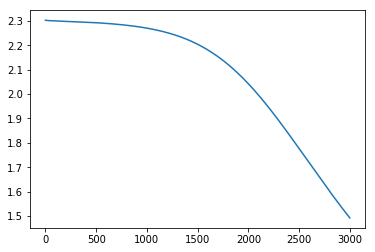

In [63]:
plt.plot(losses)

In [64]:
P, _ = nn_forward(parameters, x_train)

In [65]:
accuracy(y_train_oh, P)

0.6229666666666667

In [66]:
P, _ = nn_forward(parameters, x_test)
accuracy(y_test_oh, P)

0.6301

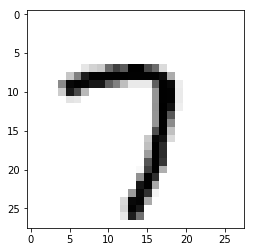

Network predicts:  7


In [69]:
i=254
visualize(x_test[i])
print("Network predicts: ", np.argmax(P[i,:]))